- 环境安装
    - 利用 python-docx 模块，Python可以批量创建和修改 Word 文档。
    - 运行 pip install python-docx，可以安装该模块
    - 注意：在第一次用 pip 安装 python-docx 时，注意要安装 python-docx，而不是 docx。
        - docx 是指另一个模块，这里我们不必介绍。
        - 但是，在导入 python-docx 模块时，需要执行 import docx，而不是 import python-docx。

In [1]:
import docx

- Word文档的组成结构：
    - .docx文档
    - 段落
    - 内容

- python-docx使用说明
    - 和纯文本相比，.docx 文件有很多结构。这些结构在 python-docx 中用 3 种不同的类型来表示。在最高一层，Document 对象表示整个文档。Document 对象包含一个 Paragraph 对象的列表，表示文档中的段落（用户在 Word 文档中输入时，如果按下回车，新的段落就开始了）。每个 Paragraph 对象都包含一个 Run 对象的列表。下图的单句段落有 4 个 Run 对象
    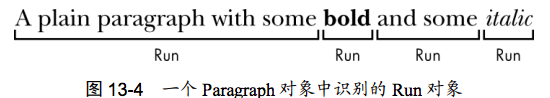
   

- 基于Document方法读取word文档

In [6]:
import docx

In [2]:
#创建了一个指定的word文档对象
doc = docx.Document('./data/demo.docx')
doc

- 基于paragraphs属性读取文档所有段落

In [8]:
doc.paragraphs

In [9]:
#获取指定段落
doc.paragraphs[0]

- 基于text属性读取指定段落内容的所有内容

In [56]:
doc.paragraphs[2].text

'A plain paragraph with some bold and some italic'

- 基于runs读取指定段落内容的组成部分和组成部分的内容

In [57]:
doc.paragraphs[2].runs

In [64]:
doc.paragraphs[2].runs[3].text

'italic'

- 如何区分python-docx对于run对象的切分

In [73]:
#中文段落进行run构成的探测
len(doc.paragraphs[1].runs)

3

In [74]:
print(doc.paragraphs[1].runs[0].text)
print(doc.paragraphs[1].runs[1].text)
print(doc.paragraphs[1].runs[2].text)

我是你的好朋友
,
那你喜欢我吗？


In [ ]:
#在中文段落中，是以标点符号进行run的构建/切分

In [75]:
#对英文段落进行run构成的探测
len(doc.paragraphs[2].runs)

4

In [76]:
print(doc.paragraphs[2].runs[0].text)
print(doc.paragraphs[2].runs[1].text)
print(doc.paragraphs[2].runs[2].text)
print(doc.paragraphs[2].runs[3].text)

A plain paragraph with some 
bold
 and some 
italic


In [ ]:
#在英文段落中是以内容的样式进行run的切分

- Paragraph 对象调用 len()，结果告诉我们有 4 个 Run 对象。第一个对象包含'A plain paragraph with some '。然后，文本变为粗体样式，所以’bold’开始了一个新的 Run 对象。在这之后，文本又回到了非粗体的样式，这导致了第三个 Run 对象，' and some '。最后，第四个对象包含'italic'，是斜体样式。

- 从.docx 文件中取得完整的文本
    - 如果你只关心 Word 文档中的文本，不关心样式信息，就可以利用 getText()函数。它接受一个.docx 文件名，返回其中文本的字符串，当然getText函数需要自己实现。

getText()函数打开了 Word 文档，循环遍历 paragraphs 列表中的所有 Paragraph对象，然后将它们的文本添加到 fullText 列表中。循环结束后，fullText 中的字符串连接在一起，中间以换行符分隔

In [3]:
import docx
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)
print(getText('./data/demo.docx'))

Document Title
我是你的好朋友,那你喜欢我吗？
A plain paragraph with some bold and some italic
Heading, level 1
Intense quote
first item in unordered list
first item in ordered list




### 写入 Word 文档
- 调用 add_paragraph()方法，添加段落
- 调用 add_run()方法，向它传入一个字符串

In [5]:
#添加段落内容
dc = docx.Document() #创建了一个全新的文档对象
p1 = dc.add_paragraph(text='i am a student!i love reading!')
p2 = dc.add_paragraph(text='i am a Bobo!i love Money!')

dc.save('./data/new_word.docx')

In [123]:
#向指定的段落中添加run
dc = docx.Document() #创建了一个全新的文档对象
p1 = dc.add_paragraph(text='i am a student!i love reading!')
p2 = dc.add_paragraph(text='i am a Bobo!i love Money!')

p2.add_run(text='我是内容1.')
p2.add_run(text='我是内容2.')

dc.save('./data/new_word.docx')

- 注意：新的 Paragraph 对象只能添加在文档的末尾，新的 Run 对象只能添加在 Paragraph 对象的末尾。

- 添加样式
    - add_paragraph()和 add_run()都接受可选的第二个参数，它是表示 Paragraph 或Run 对象样式的字符串
        - 注意设置run的样式，在样式字符串结尾需要加上Char
    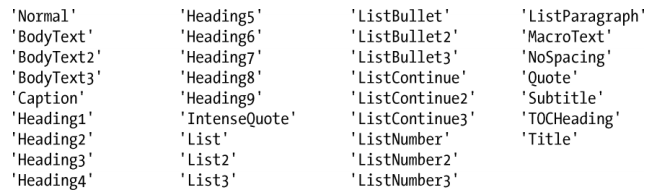


In [127]:
dc = docx.Document() #创建了一个全新的文档对象
#指定段落的样式
p1 = dc.add_paragraph(text='i am a student!i love reading!',style='Heading1')
p2 = dc.add_paragraph(text='i am a Bobo!i love Money!',style='Heading5')

p2.add_run(text='我是内容1.')
p2.add_run(text='我是内容2.',style='QuoteChar')

dc.save('./data/new_word.docx')

#### 单独设置文本样式

- 设置文字大小

In [39]:
from docx import Document
from docx.shared import Pt

document = Document()
p = document.add_paragraph()
run = p.add_run('个人简历')  # 使用add_run添加文字
run.font.size = Pt(26) #字体大小设置，和word里面的字号相对应，小一

document.save('./data/styleBy.docx')  #保存文档

- 设置对齐
    - 需要导入一个类WD_ALIGN_PARAGRAPH

In [42]:
from docx import Document
from docx.enum.text import WD_ALIGN_PARAGRAPH

document = Document()
p = document.add_paragraph()
run = p.add_run('自我介绍')  # 使用add_run添加文字
p.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.RIGHT    #段落文字居中设置

document.save('./data/styleBy.docx')  #保存文档

左右对齐，WD_ALIGN_PARAGRAPH.LEFT/RIGHT

- 设置文字颜色
    - 需要使用RGB颜色

In [44]:
from docx import Document
from docx.shared import RGBColor

document = Document()
p = document.add_paragraph()
run = p.add_run('自我介绍')  # 使用add_run添加文字

run.font.color.rgb = RGBColor(255,0,0)

document.save('./data/styleBy.docx')  #保存文档

- 字体加粗

In [45]:
from docx import Document
document = Document()
p = document.add_paragraph()
run = p.add_run('自我介绍')  # 使用add_run添加文字
run_new = p.add_run('字体加粗')  # 使用add_run添加文字

run_new.bold = True

document.save('./data/styleBy.docx')  #保存文档

- 设置字体

In [47]:
from docx import Document
from docx.oxml.ns import qn

document = Document()
p = document.add_paragraph()
run = p.add_run('天生我才必有用！')  # 使用add_run添加文字
document.styles['Normal'].font.name = '华文行楷'  # 设置字体
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), '华文行楷')

document.save('./data/styleBy.docx')  #保存文档

- 添加标题
    - 调用 add_heading()将添加一个段落，并使用一种标题样式
    - add_heading()的参数，是一个标题文本的字符串，以及一个从 0 到 4 的整数。整数 0 表示标题是 Title 样式，这用于文档的顶部。整数 1 到 4 是不同的标题层次，1是主要的标题，4 是最低层的子标题。add_heading()返回一个 Paragraph 对象，让你不必多花一步从 Document 对象中提取它。

In [129]:
doc = docx.Document()
doc.add_heading('Header 0', 0)
doc.add_heading('Header 1', 1)
doc.add_heading('Header 2', 2)
doc.add_heading('Header 3', 3)
doc.add_heading('Header 4', 4)
doc.save('./data/headings.docx')

- 添加换行符和换页符
    - 要添加换行符（而不是开始一个新的段落），可以在 Run 对象上调用 add_break()方法，换行符将出现在它后面。如果希望添加换页符，可以将 docx.text.WD_BREAK.PAGE作为唯一的参数，传递给 add_break()

In [143]:
#换行符
dc = docx.Document()
dc.add_paragraph('i am a teacher!')
dc.paragraphs[0].runs[0].add_break() #添加一个换行符
dc.paragraphs[0].add_run('hello!!!')
dc.add_paragraph('i am a student!')
print(len(dc.paragraphs))
dc.save('./data/new.docx')

2


In [145]:
#换页符号
dc = docx.Document()
dc.add_paragraph('i am a teacher!')
dc.paragraphs[0].runs[0].add_break(docx.text.WD_BREAK.PAGE) #添加一个换行符
dc.add_paragraph('i am a student!')
print(len(dc.paragraphs))
dc.save('./data/new.docx')

2


- 添加图像
    - Document 对象有一个 add_picture()方法，让你在文档中添加图像
        - 第一个参数是一个字符串，表示图像的文件名。
        - 可选的 width 和 height 关键字参数，将设置该图像在文档中的宽度和高度。如果省略，宽度和高度将采用默认值，即该图像的正常尺寸。
            - 你可能愿意用熟悉的单位来指定图像的高度和宽度，诸如英寸或厘米。所以在指定width 和height 关键字参数时，可以使用docx.shared.Inches()和 docx.shared.Cm()函数。

- 向新文档任意位置添加图片

In [56]:
doc = docx.Document()
doc.add_paragraph('This is on the first page!')

doc.add_picture('./data/zophie.png', width=docx.shared.Inches(10),height=docx.shared.Cm(20))

doc.add_paragraph('This is on the second page!')
doc.save('./data/twoPage.docx')

- 向已有的文档添加添加图片

In [57]:
doc = docx.Document('./data/twoPage.docx')
doc.add_picture('./data/zophie.png', width=docx.shared.Inches(3),height=docx.shared.Cm(5))
doc.save('./data/twoPage.docx')

#### 添加表格

- 创建表格
    - 基于Document的add_table方法增加一个表格
    - 参数：
        - rows
        - cols
        - style

In [82]:
doc = docx.Document()
tb = doc.add_table(rows=3,cols=3,style='Light List Accent 3')

- 常用的表格样式：
    - Light Shading
    - Light Shading Accent 1-6
    - Light List Accent 1-6
    - Light Grid Accent 1-6
    - Medium Shading 1 Accent 1-6
    - ......

- 向表格中添加数据
    - 依次访问到表格中的每一个cell，然后按照指定要求填充数据即可
        - 基于rows属性和cells属性可以逐步访问到表格中的cell
        - 基于add_paragraph方法即可像cell里添加文本

In [84]:
#rows返回所有的行对象
list(tb.rows)

In [86]:
#columns返回所有列对象
list(tb.columns)

In [89]:
#cells返回行中所有的单元格
tb.rows[0].cells 

(<docx.table._Cell at 0x10e1e5f98>,
 <docx.table._Cell at 0x10e1e52b0>)

In [90]:
#向cell中添加数据
tb.rows[0].cells[0].add_paragraph('hello')

In [91]:
#批量填充表格
alist = ['name','salary','address','bobo','10000','BJ','bobo1','20000','SH']
i = 0
for row in tb.rows:
    for cell in row.cells:
        cell.add_paragraph(text=alist[i])
        i+=1
doc.save('./data/table.docx')

- 添加行列
    - add_row()
    - add_column()

In [92]:
tb.add_row()
tb.add_column(docx.shared.Cm(3))
doc.save('./data/table.docx')

- 设置表格列宽 & 行高
    - 列宽：基于表格的cell设置其width属性
    - 行高：基于表格的行设置其height属性

In [94]:
#设置下行高
tb.rows[0].height = docx.shared.Cm(3)

In [95]:
#设置列宽
tb.rows[0].cells[0].width = docx.shared.Cm(10)

In [96]:
doc.save('./data/table.docx')

- 表格cell的合并
    - merge方法

In [98]:
c1 = tb.cell(0,1)
c2 = tb.cell(1,1)
c1.merge(c2)
doc.save('./data/table.docx')

### 实践：生成电视剧简介海报


In [2]:
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.oxml.ns import qn
from docx.shared import RGBColor
from docx.shared import Inches
#标题
document = Document()
p = document.add_paragraph()
run = p.add_run('琅琊榜')  # 使用add_run添加文字
run.font.size = Pt(26) #字体大小设置，和word里面的字号相对应，小一
p.paragraph_format.alignment = WD_ALIGN_PARAGRAPH.CENTER    #段落文字居中设置
run.bold = True  # 字体加粗
document.styles['Normal'].font.name = '宋体'  # 设置字体
document.styles['Normal']._element.rPr.rFonts.set(qn('w:eastAsia'), '宋体')
run.font.color.rgb = RGBColor(255,0,0) #颜色设置，这里是用RGB颜色

#图片
pic = document.add_picture('./data/huge.png',width = Inches(5))  # 添加图片
last_paragraph = document.paragraphs[-1]
last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER      #图片居中设置

#剧情简介
p = document.add_paragraph()
run = p.add_run('剧情简介')
run.font.size = Pt(22)  # 二号
run.bold = True

p = document.add_paragraph()
run = p.add_run('梅长苏（胡歌饰）本远在江湖，却名动帝辇。江湖传言：“江左梅郎，麒麟之才，得之可得天下。”作为天下第一大帮“江左盟”的首领，梅长苏“梅郎”之名响誉江湖。然而，有着江湖至尊地位的梅长苏，却是一个病弱青年、弱不禁风，背负着十多年前巨大的冤案与血海深仇，就连身世背后也隐藏着巨大的秘密。')
p_format = p.paragraph_format
p_format.first_line_indent = Inches(0.2)  # 首行缩进

document.add_paragraph(text='\r', style=None)  # 换行

p = document.add_paragraph()
run = p.add_run('音乐原声')
run.font.size = Pt(22)  # 二号
run.bold = True

table = document.add_table(rows=4, cols=5) 
def th(x,y,content):
    """
    th样式
    :param x: x坐标
    :param y: y坐标
    :param content: 内容
    :return: None
    """
    # print(grid,content)
    run = table.cell(x,y).paragraphs[0].add_run(content)
    run.bold = True  # 加粗

def td_red(table,x, y,content):
    """
    td红色字体
    :param table: 表格对象
    :param x: x坐标
    :param y: y坐标
    :param content: 内容
    :return: None
    """
    run = table.cell(x, y).paragraphs[0].add_run(content)
    run.font.size = Pt(11)
    run.font.color.rgb = RGBColor(255, 0, 0)

th(0,0,"歌曲")
th(0,1,"演唱者")
th(0,2,"作曲")
th(0,3,"作词")
th(0,4,"类型")

table.cell(1,0).text = "《风起时》"
td_red(table,1,1,"胡歌")
table.cell(1,2).text = "孟可"
table.cell(1,3).text = "海宴"
table.cell(1,4).text = "主题曲、片尾曲"

table.cell(2,0).text = "《红颜旧》"
table.cell(2,1).text = "刘涛"
table.cell(2,2).text = "赵佳霖"
table.cell(2,3).text = "袁亮"
table.cell(2,4).text = "插曲"

table.cell(3,0).text = "《赤血长殷》"
table.cell(3,1).text = "王凯"
table.cell(3,2).text = "于海航"
table.cell(3,3).text = "清彦、冰封"
table.cell(3,4).text = "插曲"

table.style = document.styles['Table Grid']  # 表格样式

document.save('./data/琅琊榜.docx')  #保存文档


### 批量生成审批报告

In [3]:
from docx import Document
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.shared import Pt      
from docx.oxml.ns import qn     
from docx.shared import Inches 
import time
#客户名单
company_list = ['客户张三','客户李四']
today = time.strftime("%Y{y}%m{m}%d{d}",time.localtime()).format(y='年',m='月',d='日') #获取今日时间，整理成年月日格式

for i in company_list:
    document = Document()
    document.styles['Normal'].font.name = u'宋体'  #设置文档的基础字体
    document.styles['Normal'].element.rPr.rFonts.set(qn('w:eastAsia'),u'宋体')  #设置文档的基础中文字体
    document.styles['Normal'].font.size = Pt(14)#设置文档字体为14磅
    
    #插入图片
    document.add_picture('./data/logo.png', height=Inches(1))  # 在文档上方插入图片作为文件红头，宽度为6英寸
    last_paragraph = document.paragraphs[-1]
    last_paragraph.alignment = WD_ALIGN_PARAGRAPH.CENTER
    
    #建立第一个自然段
    p1 = document.add_paragraph()  #初始化建立第一个自然段
    p1.alignment = WD_PARAGRAPH_ALIGNMENT.CENTER  #对齐方式为居中，没有这句默认为左对齐
    run1 = p1.add_run('审批报告说明')
    run1.font.name = u'微软雅黑'   #设置西文字体
    run1.element.rPr.rFonts.set(qn('w:eastAsia'),u'微软雅黑')  #设置段中文字体
    run1.font.size = Pt(21)   #设置字体大小为21磅
    run1.font.bold = True    #设置加粗


    #建立第二个自然段
    p2 = document.add_paragraph()  #初始化建立第二个自然段
    run2 = p2.add_run('尊敬的%s:'%i)   #这个是对客户称谓
    run2.font.name = u'仿宋_GB2312'   #设置西文字体
    run2.element.rPr.rFonts.set(qn('w:eastAsia'),u'仿宋_GB2312')  #设置段中文字体
    run2.font.size = Pt(16)   #设置字体大小为16磅
    run2.font.bold = True    #设置加粗

    #建立第三个自然段
    p3 = document.add_paragraph()  #初始化建立第三个自然段
    run3 = p3.add_run('   非常感谢贵公司长期以来对我公司支持。我公司同意了该项目的审核批复，今后与贵公司的联络和业务跟进工作由我公司Bobo负责，请贵公司一如既往得给与合作和支持。谢谢')   #内容
    run3.font.name = u'仿宋_GB2312'   #设置西文字体
    run3.element.rPr.rFonts.set(qn('w:eastAsia'),u'仿宋_GB2312')  #设置段中文字体
    run3.font.size = Pt(16)   #设置字体大小为16磅
    run3.font.bold = True    #设置加粗

    #建立第四个自然段
    p4 = document.add_paragraph()  #初始化建立第四个自然段
    p4.alignment = WD_PARAGRAPH_ALIGNMENT.RIGHT  # 对齐方式为居中
    run4 = p4.add_run('联系人：小明  电话：188888888888')   #内容
    run4.font.name = u'仿宋_GB2312'   #设置西文字体
    run4.element.rPr.rFonts.set(qn('w:eastAsia'),u'仿宋_GB2312')  #设置段中文字体
    run4.font.size = Pt(16)   #设置字体大小为16磅
    run4.font.bold = True    #设置加粗


    #插入表格
    table = document.add_table(rows=3,cols=3,style="Table Grid")   #添加3行3列表格
    table.cell(0,0).merge(table.cell(0,2))   #将第一行合并，将0行0列合并到0行2列
    table_run1 = table.cell(0,0).paragraphs[0].add_run('%s产品报价表'%i)
    table_run1.font.name = u'隶书'
    table_run1.element.rPr.rFonts.set(qn('w:eastAsia'),u'隶书')
    table.cell(0,0).paragraphs[0].alignment = WD_PARAGRAPH_ALIGNMENT.CENTER

    table.cell(1,0).text = '日期'
    table.cell(1,1).text = '价格'
    table.cell(1,2).text = '备注'
    table.cell(2,0).text = today
    table.cell(2,1).text = str('100.00')
    table.cell(2,2).text = ''


    document.save('./data/%s-审批报告.docx' % i)
